In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import glob

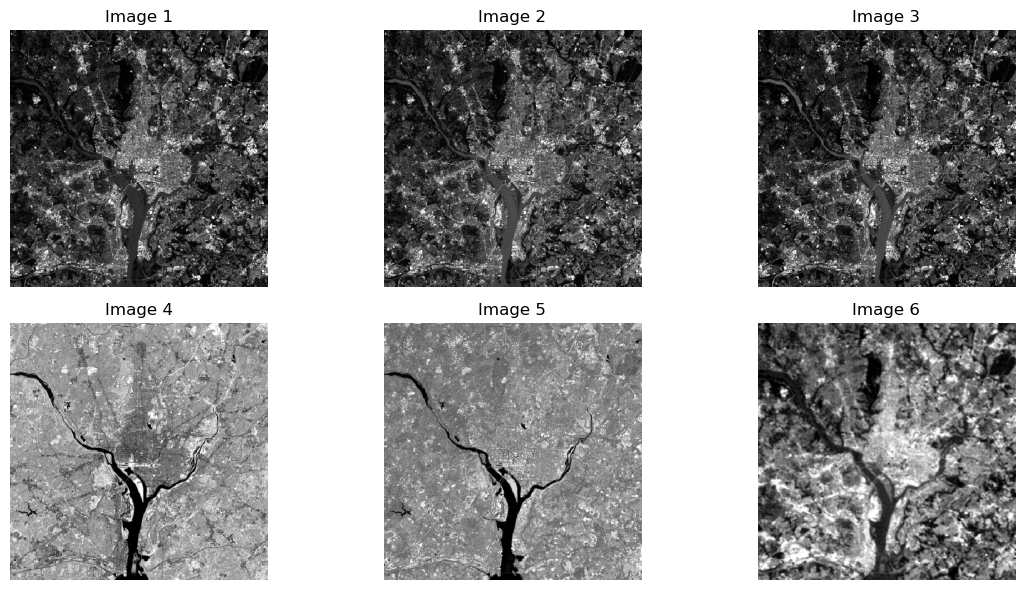

In [10]:
images_path = '/mnt/e/Term 4/HW/DIP-HW9/data/Images'

list_image = glob.glob(images_path + "/" + 'slice' + '*tif')

images = []
for i, path in enumerate(list_image):
    image = cv2.imread(path)

    if image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    images.append(gray)

plt.figure(figsize=(12, 6))
for i in range(len(list_image)): 
    plt.subplot(2, 3, i+1)  
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
images = np.array(images)
print(f'Shape of images: {images.shape[1:3]}')

mean = np.mean(images, axis=(1, 2))
print(f'Mean Vector: {mean}')

Shape of images: (564, 564)
Mean Vector: [ 61.97237941  67.5084157   62.14670728 146.18655374 134.42136651
 111.43431228]


In [25]:
stacked = np.moveaxis(images, 0, -1)
pixel_vectors = stacked.reshape(-1, 6)
print(f'Number of vectors is: {pixel_vectors.shape[0]}')

Number of vectors is: 318096


In [30]:
mean_vector = np.mean(pixel_vectors, axis=0)
centered_vectors = pixel_vectors - mean_vector

cov_matrix = np.cov(centered_vectors, rowvar=False)

In [43]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
idx_sorted = np.argsort(eigen_values)[::-1]

eigen_values_sorted = np.sort(eigen_values)[::-1]
print(f'Eigen Values are: {eigen_values_sorted}')

eigen_vectors_sorted = eigen_vectors[:, idx_sorted]

Eigen Values are: [10344.30480364  2965.89773444  1400.63502108   203.45548
    94.27739436    31.03727969]
